# Homework 03


## Part 1 - Questions

### Question 1: 

*In different decades (before 2000, 2000-2019, after 2010), what is the trend of the earning of different Genre

* Who (population): None(Probably companies)
* What (subject, discipline): Earning
* Where (location): Online
* When (snapshot, longitudinal): Different Decades
* How much data do you need to do the analysis/work: ['Total Earning','Release Date','Genre']

### Question 2: 

*In different decades (before 2000, 2000-2019, after 2010), what is the trend of the matches of different Genre

* Who (population): Pro Gamers
* What (subject, discipline): TODO
* Where (location): Online
* When (snapshot, longitudinal): Different Decades
* How much data do you need to do the analysis/work: ['Online Tournaments','Release Date','Genre']

### Question 3: 

*In different decades (before 2000, 2000-2019, after 2010), what is the trend of the gamers of different Genre

* Who (population): Pro Gamers
* What (subject, discipline): TODO
* Where (location): Online
* When (snapshot, longitudinal): Different Decades
* How much data do you need to do the analysis/work: ['Total Players','Release Date','Genre']

### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?

Game Companies like ActivitionBlizzard or game medias like IGN

## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: General Esports Data
2. Link to Data: "https://www.kaggle.com/rankirsh/esports-earnings"
3. Source / Origin: 
	* Author or Creator: Ran.Kirsh
	* Publication Date: 2020/07
	* Publisher: Ran.Kirsh
	* Version or Data Accessed: Vision8
4. License: CC0: Public Domain
5. Can You Use this Data Set for Your Intended Use Case? Yes

## Format




### Overview

* Format: CSV
* Size: 31.1kb
* Number of Records: 512

### Sample of Data




In [25]:
# TODO show a few lines of data from the actual file
# Use "regular" Python to do this in this code block
# Assume that jupyter-lab was started in your root directory
# with open('./data/raw/example-data.csv', 'r'): 
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd  too sad unable to use this :(
import csv
with open('../data/raw/GeneralEsportData.csv') as datas:
    this_csv_reader = csv.reader(datas, delimiter=",")
    header = next(this_csv_reader)
    old_ages = []
    middle_ages = []
    modern_ages = []
    a = next(this_csv_reader)
    try:
        while a:
            if int(a[1] )<2000:
                old_ages.append(a)
            elif int(a[1])<2010:
                middle_ages.append(a)
            else:
                modern_ages.append(a)
            a = next(this_csv_reader)
    except StopIteration:
            pass
print(header)
print(old_ages[0])

['Game', 'ReleaseDate', 'Genre', 'TotalEarnings', 'OnlineEarnings', 'TotalPlayers', 'TotalTournaments']
['Age of Empires', '1997', 'Strategy', '190075.61', '33235.72', '246', '95']



### Fields or Column Headers

* Field/Column 1: ReleaseDate(str)
* Field/Column 2: Genre(str)
* Field/Column 3: TotalEarnings(str)
* Field/Column 4: TotalPlayers(str)
* Field/Column 5: TotalTournaments(str)

## Part 3 - Extract / Transform

TODO describe your process for extracting, transforming, cleaning your incoming data:

* what columns you'll be using (extracting) from your dataset
* how you're planning to convert the data into analogous python types / how you'll deal with type issues (for example, you may want a column that's numeric, but the data contains a label, such as 4 months) 
* any other kind of cleaning (_normalizing_ data, filling in missing values, etc.) that you'll have to perform
* what you'll use a generator for...


In [44]:
# First I want to make sure that every data can present the main stream of the game at that time. So I will drop those data with low earnings, low players and low matches,Also, considering the change of ages, different ages have different standards.
def getData(n,a = 0):
    yield n[a]

filtered_old_ages = []
for a in old_ages:
    if float(a[3])>10 and float(a[3]) >= 30 and float(a[3]) >= 20:
        filtered_old_ages.append(a)
filtered_old_ages
filtered_middle_ages = []
for a in middle_ages:
    if float(a[3])>1000 and int(a[5]) >= 100 and int(a[6]) >= 50:
        filtered_middle_ages.append(a)

filtered_modern_ages = []
for a in modern_ages:
    if float(a[3])>10000 and int(a[5]) >= 1000 and int(a[6]) >= 100:
        filtered_modern_ages.append(a)

#generator is used here to present all datas after the filter
a = 0
while a < len(filtered_old_ages):
    print(next(getData(filtered_old_ages,a)))
    a +=  1

['Age of Empires', '1997', 'Strategy', '190075.61', '33235.72', '246', '95']
['Age of Empires II', '1999', 'Strategy', '1629065.26', '1011400.39', '1064', '663']
['Internet Chess Club', '1995', 'Strategy', '10000', '10000', '6', '1']
['StarCraft: Brood War', '1998', 'Strategy', '8409338.61', '406439.29', '682', '678']
['Windjammers', '1994', 'Strategy', '4172.16', '40', '32', '11']
['Descent 3', '1999', 'First-Person Shooter', '50000', '0', '1', '1']
['Doom II: Hell on Earth', '1994', 'First-Person Shooter', '4680', '2480', '11', '6']
['Quake II', '1997', 'First-Person Shooter', '140179.5', '379.5', '32', '10']
['Quake III Arena', '1999', 'First-Person Shooter', '1137832.19', '6569.58', '243', '100']
['QuakeWorld', '1996', 'First-Person Shooter', '103251.7', '5246.26', '47', '15']
['Unreal Tournament', '1999', 'First-Person Shooter', '89000', '0', '14', '5']
["Fighter's History Dynamite", '1994', 'Fighting Game', '195', '0', '3', '1']
['Garou: Mark of the Wolves', '1999', 'Fighting Gam

In [27]:
#Then we start to calculate the sum of earnings for different kinds of games in differnt times
old_ages_earning = {}
for a in filtered_old_ages:
    if a[2] in old_ages_earning:
        old_ages_earning[a[2]] += float(a[4])
    else:
        old_ages_earning[a[2]] = float(a[4])

middle_ages_earning = {}
for a in filtered_middle_ages:
    if a[2] in middle_ages_earning:
        middle_ages_earning[a[2]] += float(a[4])
    else:
        middle_ages_earning[a[2]] = float(a[4])

modern_ages_earning = {}
for a in filtered_modern_ages:
    if a[2] in modern_ages_earning:
        modern_ages_earning[a[2]] += float(a[4])
    else:
        modern_ages_earning[a[2]] = float(a[4])
print(old_ages_earning)
print(middle_ages_earning)
print(modern_ages_earning)

{'Strategy': 1461115.4, 'First-Person Shooter': 14675.34, 'Fighting Game': 1757.2, 'Sports': 0.0, 'Puzzle Game': 11026.38}
{'Strategy': 1860211.6600000001, 'First-Person Shooter': 1945385.56, 'Multiplayer Online Battle Arena': 7742866.62, 'Role-Playing Game': 341948.7, 'Fighting Game': 33417.71, 'Racing': 1405787.23}
{'Strategy': 5339690.05, 'First-Person Shooter': 45084504.97, 'Multiplayer Online Battle Arena': 19702891.91, 'Fighting Game': 183487.07, 'Sports': 7055170.22, 'Collectible Card Game': 5669798.67, 'Battle Royale': 65355383.519999996}


In [28]:
#Then we did the same operation on gamers
old_ages_gamers = {}
for a in filtered_old_ages:
    if a[2] in old_ages_gamers:
        old_ages_gamers[a[2]] += int(a[5])
    else:
        old_ages_gamers[a[2]] = int(a[5])

middle_ages_gamer = {}
for a in filtered_middle_ages:
    if a[2] in middle_ages_gamer:
        middle_ages_gamer[a[2]] += int(a[5])
    else:
        middle_ages_gamer[a[2]] = int(a[5])

modern_ages_gamer = {}
for a in filtered_modern_ages:
    if a[2] in modern_ages_gamer:
        modern_ages_gamer[a[2]] += int(a[5])
    else:
        modern_ages_gamer[a[2]] = int(a[6])
print(old_ages_gamers)
print(middle_ages_gamer)
print(modern_ages_gamer)

{'Strategy': 2030, 'First-Person Shooter': 348, 'Fighting Game': 555, 'Sports': 40, 'Puzzle Game': 45}
{'Strategy': 1294, 'First-Person Shooter': 8285, 'Multiplayer Online Battle Arena': 7640, 'Role-Playing Game': 413, 'Fighting Game': 2380, 'Racing': 968}
{'Strategy': 6061, 'First-Person Shooter': 12680, 'Multiplayer Online Battle Arena': 2724, 'Fighting Game': 2946, 'Sports': 1263, 'Collectible Card Game': 902, 'Battle Royale': 7572}


In [29]:
#Finally we did the same operation on tournaments
old_ages_match = {}
for a in filtered_old_ages:
    if a[2] in old_ages_match:
        old_ages_match[a[2]] += int(a[6])
    else:
        old_ages_match[a[2]] = int(a[6])

middle_ages_match = {}
for a in filtered_middle_ages:
    if a[2] in middle_ages_match:
        middle_ages_match[a[2]] += int(a[6])
    else:
        middle_ages_match[a[2]] = int(a[6])
        
modern_ages_match = {}
for a in filtered_modern_ages:
    if a[2] in modern_ages_match:
        modern_ages_match[a[2]] += int(a[6])
    else:
        modern_ages_match[a[2]] = int(a[6])
print(old_ages_match)
print(middle_ages_match)
print(modern_ages_match)

{'Strategy': 1448, 'First-Person Shooter': 137, 'Fighting Game': 261, 'Sports': 13, 'Puzzle Game': 11}
{'Strategy': 1594, 'First-Person Shooter': 2045, 'Multiplayer Online Battle Arena': 2577, 'Role-Playing Game': 118, 'Fighting Game': 2955, 'Racing': 182}
{'Strategy': 6061, 'First-Person Shooter': 6701, 'Multiplayer Online Battle Arena': 1946, 'Fighting Game': 2291, 'Sports': 1263, 'Collectible Card Game': 902, 'Battle Royale': 1246}


## Part 4 - Descriptive Statistics

### Analysis on Numeric Data

#### Max& Min



In [30]:
# Since here all issure are similar for earining, gamers and matches, so I select earning as example
min_for_old_earning = min(old_ages_earning)
print("Minmal earning for old ages is",min_for_old_earning,", and the value is:",old_ages_earning[min_for_old_earning])
max_for_old_earning = max(old_ages_earning)
print("Maximal earning for old ages is",max_for_old_earning,", and the value is:",old_ages_earning[max_for_old_earning])
print("")
min_for_middle_earning = min(middle_ages_earning)
print("Minmal earning for middle ages is",min_for_middle_earning,", and the value is:",middle_ages_earning[min_for_middle_earning])
max_for_middle_earning = max(middle_ages_earning)
print("Maximal earning for middle ages is",max_for_middle_earning,", and the value is:",middle_ages_earning[max_for_middle_earning])
print("")
min_for_modern_earning = min(modern_ages_earning)
print("Minmal earning for modern ages is",min_for_modern_earning,", and the value is:",modern_ages_earning[min_for_modern_earning])
max_for_modern_earning = max(modern_ages_earning)
print("Maximal earning for modern ages is",max_for_modern_earning,", and the value is:",modern_ages_earning[max_for_modern_earning])

Minmal earning for old ages is Fighting Game , and the value is: 1757.2
Maximal earning for old ages is Strategy , and the value is: 1461115.4

Minmal earning for middle ages is Fighting Game , and the value is: 33417.71
Maximal earning for middle ages is Strategy , and the value is: 1860211.6600000001

Minmal earning for modern ages is Battle Royale , and the value is: 65355383.519999996
Maximal earning for modern ages is Strategy , and the value is: 5339690.05


#### Mean


In [31]:
# TODO: copy and paste your results here
old_sum = 0
for a in old_ages_earning:
    old_sum += old_ages_earning.get(a)
old_mean = old_sum/len(old_ages_earning)
print("Mean earning for old ages is",old_mean)

middle_sum = 0
for a in middle_ages_earning:
    middle_sum += middle_ages_earning.get(a)
middle_mean = middle_sum/len(middle_ages_earning)
print("Mean earning for old ages is",middle_mean)

modern_sum = 0
for a in modern_ages_earning:
    modern_sum += modern_ages_earning.get(a)
modern_mean = modern_sum/len(modern_ages_earning)
print("Mean earning for old ages is",modern_mean)

Mean earning for old ages is 297714.86399999994
Mean earning for old ages is 2221602.9133333336
Mean earning for old ages is 21198703.772857137


### Standard Division

In [32]:
# TODO: copy and paste your results here
old_division = 0
for a in old_ages_earning:
    old_division += pow(abs(old_ages_earning.get(a)-old_mean),2)
old_sd = old_division/len(old_ages_earning)
print("Standard division of earning for old ages is",old_sd)

middle_division = 0
for a in middle_ages_earning:
    middle_division += pow(abs(middle_ages_earning.get(a)-middle_mean),2)
middle_sd = middle_division/len(middle_ages_earning)
print("Standard division of earning for middle ages is",middle_sd)

modern_division = 0
for a in modern_ages_earning:
    modern_division += pow(abs(modern_ages_earning.get(a)-modern_mean),2)
modern_sd = modern_division/len(modern_ages_earning)
print("Standard division of earning for modern ages is",modern_sd)


Standard division of earning for old ages is 338405509059.26544
Standard division of earning for middle ages is 6613010376297.363
Standard division of earning for modern ages is 522416486090626.6


###  Analysis on Categorical Data

### Frequency

In [33]:
# TODO: copy and paste your results here
frequencySet = {}
for a in filtered_old_ages:
    if a[2] in frequencySet:
        frequencySet[a[2]] += 1
    else:
        frequencySet[a[2]] = 1

for a in filtered_middle_ages:
    if a[2] in frequencySet:
        frequencySet[a[2]] += 1
    else:
        frequencySet[a[2]] = 1
for a in filtered_modern_ages:
    if a[2] in frequencySet:
        frequencySet[a[2]] += 1
    else:
        frequencySet[a[2]] = 1
frequencySet

{'Strategy': 9,
 'First-Person Shooter': 17,
 'Fighting Game': 20,
 'Sports': 4,
 'Puzzle Game': 3,
 'Multiplayer Online Battle Arena': 4,
 'Role-Playing Game': 1,
 'Racing': 2,
 'Collectible Card Game': 1,
 'Battle Royale': 3}

#### Unique Values

In [34]:
# TODO: copy and paste your results here

## Part 5 - Visualizations



In [35]:
# TODO: add visualizations here
#plt.bar(old_ages_earning.keys(), old_ages_earning.values(), width=0.5, color='g')
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
plt.bar(old_ages_earning.keys(),  old_ages_earning.values(), color ='r', width = barWidth, 
        edgecolor ='grey', label ='Old') 
#plt.bar(middle_ages_earning.keys(), middle_ages_earning.values(), color ='g', width = barWidth, 
        #edgecolor ='grey', label ='Middle') 
#plt.bar( modern_ages_earning.keys(), modern_ages_earning.values(), color ='b', width = barWidth, 
        #edgecolor ='grey', label ='Modern') 
plt.xlabel('Genre', fontweight ='bold') 
plt.ylabel('Earnings', fontweight ='bold') 
plot.show()
   

NameError: name 'plot' is not defined

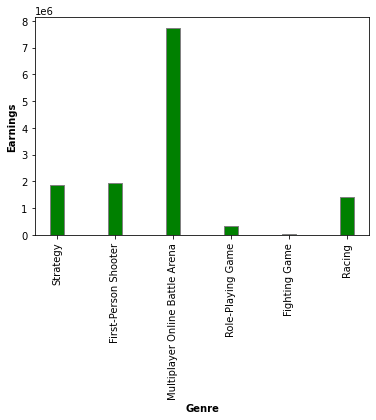

In [147]:
plt.bar(middle_ages_earning.keys(), middle_ages_earning.values(), color ='g', width = barWidth, 
        edgecolor ='grey', label ='Middle') 
plt.xticks(rotation = 90)
plt.xlabel('Genre', fontweight ='bold') 
plt.ylabel('Earnings', fontweight ='bold') 
plot.show()

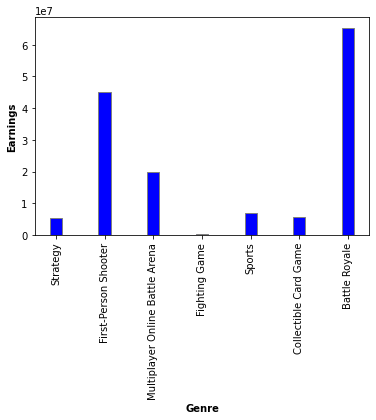

In [148]:
plt.bar( modern_ages_earning.keys(), modern_ages_earning.values(), color ='b', width = barWidth, 
        edgecolor ='grey', label ='Modern') 
plt.xticks(rotation = 90)
plt.xlabel('Genre', fontweight ='bold') 
plt.ylabel('Earnings', fontweight ='bold') 
plot.show()

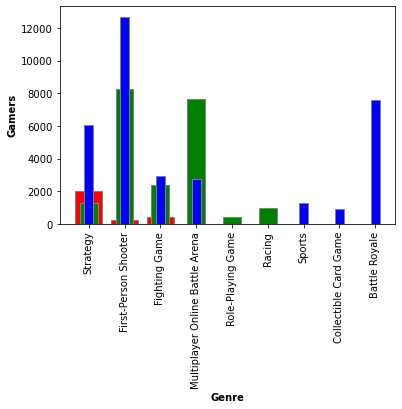

In [150]:
plt.bar(old_ages_gamers.keys(),  old_ages_gamers.values(), color ='r', width = barWidth*3, 
        edgecolor ='grey', label ='Old') 
plt.bar(middle_ages_gamer.keys(),  middle_ages_gamer.values(), color ='g', width = barWidth*2, 
        edgecolor ='grey', label ='Old') 
plt.bar(modern_ages_gamer.keys(),  modern_ages_gamer.values(), color ='b', width = barWidth, 
        edgecolor ='grey', label ='Old') 
plt.xticks(rotation = 90)
plt.xlabel('Genre', fontweight ='bold') 
plt.ylabel('Gamers', fontweight ='bold') 
plot.show()

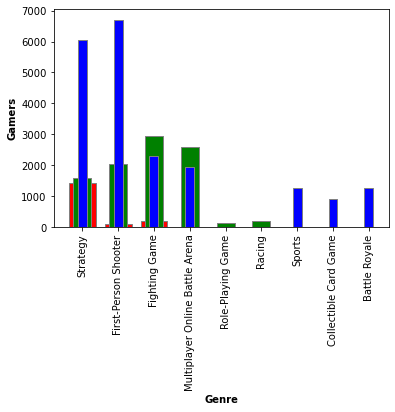

In [151]:
plt.bar(old_ages_match.keys(),  old_ages_match.values(), color ='r', width = barWidth*3, 
        edgecolor ='grey', label ='Old') 
plt.bar(middle_ages_match.keys(),  middle_ages_match.values(), color ='g', width = barWidth*2, 
        edgecolor ='grey', label ='Old') 
plt.bar(modern_ages_match.keys(),  modern_ages_match.values(), color ='b', width = barWidth, 
        edgecolor ='grey', label ='Old') 
plt.xticks(rotation = 90)
plt.xlabel('Genre', fontweight ='bold') 
plt.ylabel('Gamers', fontweight ='bold') 
plot.show()

## Part 6 - Conclusion

Through the result we can find that people have different taste in different decades. Before 2000, the dominant game type is stratage games like StarCrft or Age of Empires, and at the 2000s the dominent game comes to Nultiplayer games. Now we found that stratagy games and FPS games become the game with most earnings.

When it comes to the gamers, we found it changes again. Again before 2000, stratagy games players nearly equals to all players. But in the 2000s the number decreases and MOBA and FPS players become the game with most players. Nowthe dominant players is FPS players and followed by Strategy and Battle Royal players

Finally about the matches. We found that before 2010s,  the tournaments of stratagy is nearly the same, but recently the number increase very much. And comes to the FPS part, the FPS part increase steadly through years and noeadays befome the game with most matches. For fighting games and MOBA games, they are similar: both reach peark at 2000s and decreases 2010s. For role playing and racing, the only time they are active is the 2000s and for the rest three, it's the same except the time is 2010s.

I think overall the datas do overall well present the tendency of the evolution of game types and the numbers gathered from the csv file is very accurate and helpful for me to explore the answers.